In [2]:
conda list

# packages in environment at /home/yw/anaconda3/envs/researchPJ:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                      1_llvm    conda-forge
absl-py                   0.14.1             pyhd8ed1ab_0    conda-forge
argon2-cffi               20.1.0           py39h27cfd23_1  
async_generator           1.10               pyhd3eb1b0_0  
attrs                     21.2.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
blas                      1.0                         mkl    anaconda
bleach                    4.0.0              pyhd3eb1b0_0  
ca-certificates           2021.10.8            ha878542_0    conda-forge
certifi                   2021.10.8        py39hf3d152e_0    conda-forge
cffi                      1.14.6           py39h400218f_0  
colorama                  0.4.4              pyh9f0ad1d_0    conda-forg


Note: you may need to restart the kernel to use updated packages.


In [3]:
from typing import Any, Callable, NamedTuple, Tuple, Union
Step = int
Schedule = Callable[[Step], float]

from IPython import display
from IPython.display import Image, clear_output
from PIL import Image
import glob, os, shutil
import os.path

import time

import scipy.io as io
import scipy.sparse.csgraph as csgraph
from scipy.sparse.csgraph import laplacian as csgraph_laplacian
import scipy as sp
from scipy.stats import gaussian_kde
from scipy.linalg import null_space

import jax
from jax import jit, vmap, random, grad, value_and_grad, hessian
from jax.experimental import optimizers
from jax.experimental.optimizers import optimizer
from jax import numpy as jnp

from functools import partial
import itertools

import math
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import collections as mc
import seaborn as sns

import datetime
from tqdm.notebook import tqdm

import networkx as nx

%load_ext autoreload
%autoreload 2

In [4]:
import utils
from utils import *
from optimizers import *

In [5]:
# # load the data from the SuiteSparse Matrix Collection format
# # https://www.cise.ufl.edu/research/sparse/matrices/
# graphs = ['qh882','dwt_1005','3elt','commanche_dual','bcsstk31']
# graphdir = './testcases/'
# graphpostfix = 'dwt_1005'
# assert graphpostfix in graphs
# grid_testcase = nx.grid_graph(dim=(20, 20))
# grid_testcase_adjacency = nx.adjacency_matrix(grid_testcase).toarray().astype(np.int16)
# DEBUG=False
# if DEBUG:
#     graph, G, A, L, D, n = load_graph(graphdir+graphpostfix, A=grid_testcase_adjacency, plot_adjacency=False, verbose=True)
# else:
#     graph, G, A, L, D, n = load_graph(graphdir+graphpostfix, A=None, plot_adjacency=False, verbose=True)


Graph_random_12 can take multipler as small as 8. Anything below 8 will stuck the cluster function.
Namely, setting three fixed nodes (0,0), (8,8), (16,16) will crash the algorithm.

Graph_random_12


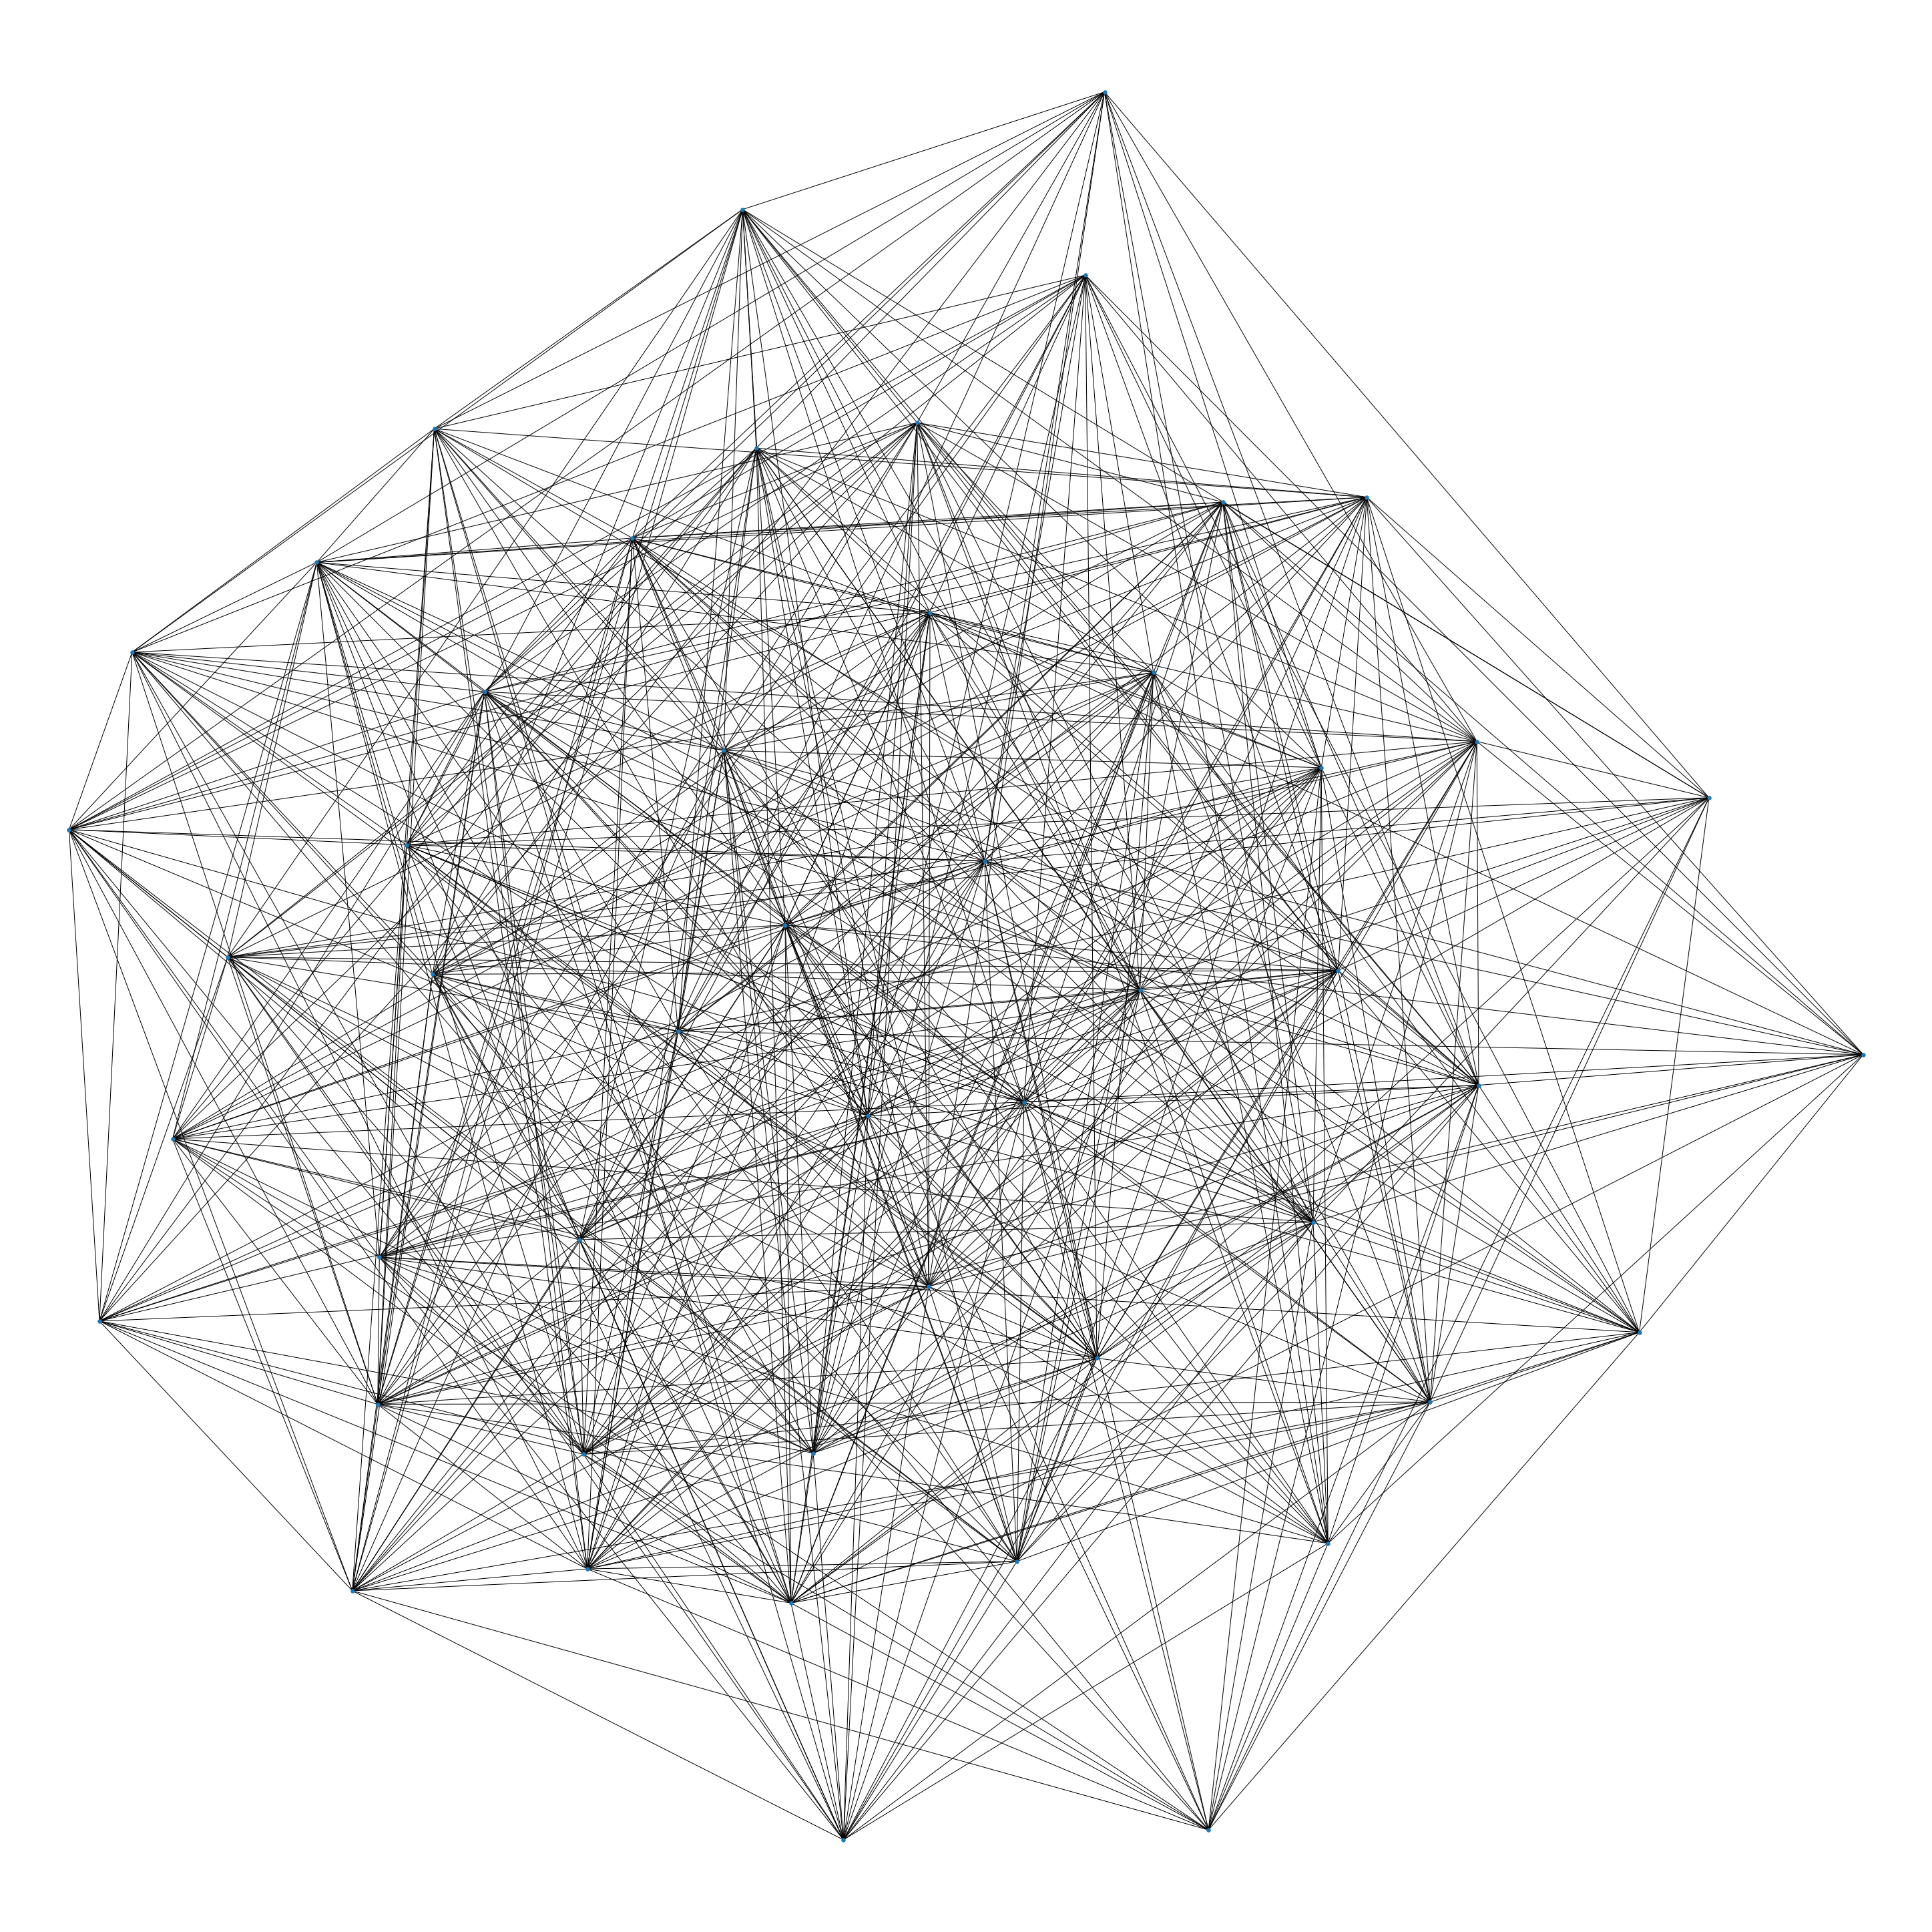

Adjacency Matrix: 
 [[0 1 1 ... 1 1 0]
 [1 0 1 ... 1 0 1]
 [1 1 0 ... 1 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Laplacian Matrix: 
 [[27. -1. -1. ... -1. -1.  0.]
 [-1. 33. -1. ... -1.  0. -1.]
 [-1. -1. 21. ... -1.  0.  0.]
 ...
 [-1. -1. -1. ... 26.  0.  0.]
 [-1.  0.  0. ...  0. 23.  0.]
 [ 0. -1.  0. ...  0.  0. 22.]]
Degree Matrix: 
 [[27  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  0  0 ...  0  0 22]]
Number of nodes: 50
Number of edges:  627
Number of connected components:  1


In [6]:
# load the data from the SuiteSparse Matrix Collection format
# https://www.cise.ufl.edu/research/sparse/matrices/
## For experiment only, PLZ DELETE ###
print("Graph_random_12")
graphdir = '../testcases(exp only)/'
graphpostfix = 'graph_random_12'

G=nx.erdos_renyi_graph(50, 0.5, seed=123, directed=False)
fig = plt.figure(figsize=(40, 40)) 
nx.draw(G, node_size=30) 
plt.axis('equal') 
plt.show() 

# A = Adjacency matrix of G
A = nx.adjacency_matrix(G).toarray().astype(np.int16)
print("Adjacency Matrix: \n",A)
# L = Laplacian matrix of G
L = csgraph_laplacian(A, normed=False).astype(np.float32)
print("Laplacian Matrix: \n",L)
# D = Degree matrix of G
D = np.diag(np.sum(A, axis=1)).astype(np.int16)
print("Degree Matrix: \n",D)
# n = number of nodes
n = A.shape[0]
print("Number of nodes:", n)
print('Number of edges: ', G.number_of_edges())
print('Number of connected components: ',nx.number_connected_components(G))
graph = nx.to_scipy_sparse_matrix(G)

# DEBUG=True
# if DEBUG:
#     graph, G, A, L, D, n = load_graph(graphdir+graphpostfix, A=grid_testcase_adjacency, plot_adjacency=False, verbose=True)
# else:
#     graph, G, A, L, D, n = load_graph(graphdir+graphpostfix, A=None, plot_adjacency=False, verbose=True)


Graph_1 can take multipler as small as 1. Anything below 1 will stuck the cluster function.
Namely, setting three fixed nodes (0,0), (1,1), (2,2) will crash the algorithm.

In [ ]:
### For experiment only, PLZ DELETE ###
print("Graph_1")
graphdir = '../testcases(exp only)/'
graphpostfix = 'graph_1'
G = nx.Graph()
edges = nx.read_edgelist('../testcases(exp only)/edge_1.txt')
nodes = nx.read_adjlist('../testcases(exp only)/node_1.txt')
G.add_edges_from(edges.edges())
G.add_nodes_from(nodes)

fig = plt.figure(figsize=(40, 40)) 
nx.draw(G, node_size=200) 
plt.axis('equal') 
plt.show() 

# A = Adjacency matrix of G
A = nx.adjacency_matrix(G).toarray().astype(np.int16)
print("Adjacency Matrix: \n",A)
# L = Laplacian matrix of G
L = csgraph_laplacian(A, normed=False).astype(np.float32)
print("Laplacian Matrix: \n",L)
# D = Degree matrix of G
D = np.diag(np.sum(A, axis=1)).astype(np.int16)
print("Degree Matrix: \n",D)
# n = number of nodes
n = A.shape[0]
print(n)
print('Number of nodes: ', n)
print('Number of edges: ', G.number_of_edges())
print('Number of connected components: ',nx.number_connected_components(G))
graph = nx.to_scipy_sparse_matrix(G)

In [7]:
del G
del A
del D

In [8]:
@jit
def project(X1, C, E_0, c=jnp.array([0,0])):
    C1 = X1.T@X1
    C1sqrt = utils._sqrtm(C1)
    Csqrt = utils._sqrtm(C)
    U,s,V = jnp.linalg.svd(Csqrt@C1sqrt)
    X = X1@jnp.linalg.inv(C1sqrt)@U@V.T@Csqrt

    negdef = jnp.all(jnp.linalg.eigvals(X.T@E_0) <= 0)
    U_E, _, V_E = jnp.linalg.svd(X.T@E_0)
    X = jax.lax.cond(negdef,
                     lambda _ : X@(-U_E@V_E.T),
                     lambda _ : X,
                     operand=None
                    )
    return X.real

@jit
def _step_noautograd(stp, X_k, A_x, A_y, b_x, b_y):
    """Perform a single gradient (using autograd) + projection step with adaptive momentum."""
    E_0 = stp*jnp.vstack([b_x,b_y]).T
    X_k_x = X_k[:,0] - stp*A_x@X_k[:,0]
    X_k_y = X_k[:,1] - stp*A_y@X_k[:,1]
    # 
    X_k_t = jnp.vstack([X_k_x,X_k_y]).T - E_0
    # 4.2 Gradient Projection
    X_k_t = project(X_k_t, C, E_0)
    return X_k_t

def pgd(X_k, A_x, A_y, b_x, b_y, C, convergence_criterion, 
           maxiters=1000, alpha=1e-2, beta=0.9):
    """Perform iterations of PGD, without autograd."""
    E_0 = jnp.stack([b_x, b_y], axis=1)
    L = jnp.linalg.inv(C)@X_k.T@(A_x@X_k+E_0)
    
    report = {'x':None, 'lossh':[f(X_k, A_x, A_y, b_x, b_y).item()], 'sln_path':[np.asarray(X_k)], 
            'foc':[foc_pgd(X_k, L, C, A_x, b_x, b_y).item()], 'step_sizes':[1], 'L':[L]}
    
    for k in tqdm(range(maxiters)):
        # backtracking line search
        f_xp = 1e8
        stp = 1

        f_x, g = value_and_grad(f)(X_k, A_x, A, b_x, b_y)
        X_k_t = X_k
        derphi=1
        while f_xp >= f_x: #- alpha * stp * derphi:
            stp *= beta
            X_k_t = _step_noautograd(stp, X_k, A_x, A_y, b_x, b_y)    
            f_xp = f(X_k_t, A_x, A_y, b_x, b_y)
        
            if stp < 1e-6:
                break  

        X_k = X_k_t
        L = jnp.linalg.inv(C)@X_k.T@(A_x@X_k+E_0)
        
        report['lossh'].append(f_xp.item())
        report['sln_path'].append(np.asarray(X_k))
        report['L'].append(np.asarray(L))
        report['step_sizes'].append(stp)
        report['foc'].append(foc_pgd(X_k, L, C, A_x, b_x, b_y).item())
        
        if len(report['lossh']) > 2 and \
        np.abs(report['lossh'][-2] - report['lossh'][-1]) <= convergence_criterion:
            print('converged')
            break
    report['x'] = X_k
        
    return report

@jit
def step(i, opt_state, A_x, A_y, b_x, b_y):
    """Perform a single gradient (using autograd) + projection step with adaptive momentum."""
    X_k = get_params(opt_state)
    f_x, g = value_and_grad(f)(X_k, A_x, A_y, b_x, b_y)
    return opt_update(i, g, opt_state), f_x

def pgd_autograd(opt_params, A_x, A_y, b_x, b_y, C, convergence_criterion, maxiters=1000):
    """Perform iterations of PGD, with autograd """
    opt_state, opt_update, get_params = opt_params
    X_k = get_params(opt_state)
    E_0 = jnp.stack([b_x, b_y], axis=1)
    L = jnp.linalg.inv(C)@X_k.T@(A_x@X_k+E_0)
    
    report = {'x':None, 'lossh':[f(X_k, A_x, A_y, b_x, b_y).item()], 'sln_path':[np.asarray(X_k)], 
            'foc':[foc_pgd(X_k, L, C, A_x, b_x, b_y).item()], 'step_sizes':[1], 'L':[L]}
    
    for k in tqdm(range(maxiters)):
        opt_state, f_k = step(k, opt_state, A_x, A_y, b_x, b_y)
        X_k = get_params(opt_state)

        L = jnp.linalg.inv(C)@X_k.T@(A_x@X_k+E_0)

        report['lossh'].append(f_k.item())
        report['sln_path'].append(np.asarray(X_k))
        report['L'].append(np.asarray(L))
        report['foc'].append(foc_pgd(X_k, L, C, A_x, b_x, b_y).item())
        
        if len(report['lossh']) > 2 and \
        np.abs(report['lossh'][-2] - report['lossh'][-1]) <= convergence_criterion:
            print('converged')
            break
            
    report['x'] = X_k
        
    return report

@jit
def _step(i, opt_state, Z):
    """Perform a single descent + projection step with arbitrary descent direction."""
    return opt_update(i, Z, opt_state)

def _D_Z(X, A, P, d, e):
    I = jnp.eye(A.shape[0])
    Adinv = jnp.linalg.inv(A + d*I)
    XtADinv = X.T@Adinv
    Del = jnp.linalg.inv(XtADinv@X)@XtADinv@e
    Z = Adinv@(-X@Del + e)
    return Del, Z

def D_Z(X, A, P, d, e):
    I = jnp.eye(A.shape[0])
    Adinv = jnp.linalg.inv(A + d*I)
    XtADinv = (X.T@P)@Adinv@P.T
    Del = jnp.linalg.inv(XtADinv@X)@XtADinv@e
    Z = P@Adinv@P.T@(-X@Del + e)
    
    return Del, Z

@jit
def _sqp(A, P, L, E_0, X):
    """Perform an iteration of SQP.""" 
    I = jnp.eye(A.shape[0])
    w = jnp.linalg.eigvals(L)
    idx = w.argsort()[::-1]   
    w = w[idx]
    E = -E_0 - (A@X + X@L)
    
    Del_0, Z_0 = D_Z(X, A, P, w[0], E[:,0])
    Del_1, Z_1 = D_Z(X, A, P, w[1], E[:,1])
    
    Z = jnp.stack([Z_0, Z_1], axis=1)
    Del = jnp.stack([Del_0, Del_1], axis=1)
    
    return Z, Del    

@jit
def sqp(A, P, pAp, L, E_0, X):
    """Perform an iteration of SQP.""" 
    I = jnp.eye(A.shape[0])
    w = jnp.linalg.eigvals(L)
    idx = w.argsort()[::-1]   
    w = w[idx]
    E = -E_0 - (pAp@X + X@L)
    
    Del_0, Z_0 = D_Z(X, A, P, w[0], E[:,0])
    Del_1, Z_1 = D_Z(X, A, P, w[1], E[:,1])
    
    Z = jnp.stack([Z_0, Z_1], axis=1)
    Del = jnp.stack([Del_0, Del_1], axis=1)
    
    return Z, Del    

def newton(opt_params, A, P, L, C, X_k, b_x, b_y, convergence_criterion, 
           maxiters=100, alpha=1e-2, beta=0.9):
    """Perform iterations of PND + backtracking line search."""    
    opt_state, opt_update, get_params = opt_params
    X_k = get_params(opt_state)
    E_0 = np.stack([b_x, b_y], axis=1)
   
    pAp = P@A@P.T

    L = L_init(X_k, C, pAp, E_0)
    #L_sym = (L + L.T)/2
    #L = L_sym
    
    report = {'x':None, 'lossh':[f(X_k, pAp, pAp, b_x, b_y).item()], 'sln_path':[np.asarray(X_k)], 
            'foc':[foc_sqp(X_k, L, C, pAp, E_0).item()], 'step_sizes':[1], 'L':[L]}
    
    for k in tqdm(range(maxiters)):         
        Z, Del = sqp(A, P, pAp, L, E_0, X_k)
        
        # backtracking line search
        f_xp = 1e8
        stp = 1
        f_x, gr = value_and_grad(f)(X_k, pAp, pAp, b_x, b_y)
        #derphi = jnp.trace(gr.T@Z)
        derphi = 1
        
        
        len_p = jnp.linalg.norm(Z)
        X_k_t = X_k
        
        opt_state_t = opt_state
        
        while f_xp >= f_x: #- alpha * stp * derphi:
            stp *= beta
            opt_state_t = _step(stp, opt_state, -Z)
            X_k_t = get_params(opt_state_t)
            f_xp = f(X_k_t, pAp, pAp, b_x, b_y)
        
            if stp * len_p < 1e-8:
                break    
        L = L + stp*Del
        foc = foc_sqp(X_k, L, C, pAp, E_0)
        
        opt_state = opt_state_t
        X_k = get_params(opt_state_t)
        
        report['sln_path'].append(np.asarray(X_k))
        report['step_sizes'].append(stp)
        report['foc'].append(foc.item())
        report['lossh'].append(f_xp.item())
        report['L'].append(np.asarray(L))
        
        if len(report['lossh']) > 2 and np.abs(report['lossh'][-2] - report['lossh'][-1]) <= convergence_criterion:
            print('converged')
            break
            
    return report
    
def ssm():
    """
    1. compute newton direction z = sqp(X, Z, v, Ax + E0) & subspace S
    2. approximate locally optimal X, L on S; X = min F(\hat{X}, B, V.T@E0)
    """
    pass

In [9]:
def map_vars(A, X_k, fixed_indices, centercons, decomp=True):
    """Preprocess variables """ 
    N = A.shape[0] 
    k = fixed_indices.shape[0]
    fixed_idx = np.zeros((k,N))
    for i in range(k):
        fixed_idx[i,fixed_indices[i]] += 1
    
    # postpone decomp, PAP
    if decomp:
        boolean_fixed_idx = fixed_idx.sum(0).astype(bool)
        boolean_nonfixed_idx = (1-fixed_idx.sum(0)).astype(bool)
        print()

        X_1x = X_k[boolean_fixed_idx,0]
        X_1y = X_k[boolean_fixed_idx,1]
        
        X_2  = X_k[boolean_nonfixed_idx]
        A_12 = A[boolean_fixed_idx, :]
        A_12 = A_12[:, boolean_nonfixed_idx] 

        b_x = X_1x@A_12
        b_y = X_1y@A_12
        X_k = X_2

        A = A[boolean_nonfixed_idx, :]
        A = A[:,boolean_nonfixed_idx]
        P = np.eye(A.shape[0])
        
        # x coord needs to sum up to 0
        constraints = np.expand_dims(np.ones(X_2.shape[0]),0)
        P = null_space(constraints).T
        pinvcons = np.linalg.pinv(constraints)
        
        n0_x = pinvcons@(np.expand_dims(centercons[0],0))

        b_x = b_x@P.T 
        n0_y = pinvcons@(np.expand_dims(centercons[1],0))
        b_y = b_y@P.T 
        
        ### do this computation later to keep A's sparsity
        #A = P@A@P.T
    else:
        if k>0:
            fixed_coordsx = X_k[fixed_indices,0]
            fixed_coordsy = X_k[fixed_indices,1]

            constraints = np.concatenate([fixed_idx,np.expand_dims(1-fixed_idx.sum(0),0)])
            fixed_coordsx = np.concatenate([fixed_coordsx,np.expand_dims(centercons[0],0)])
            fixed_coordsy = np.concatenate([fixed_coordsy,np.expand_dims(centercons[1],0)])
            P = null_space(constraints).T
            #_,P = qr_null(constraints).T

            pinvcons = np.linalg.pinv(constraints)

            n0_x = (pinvcons@fixed_coordsx)
            b_x = (P@(A@n0_x))

            n0_y = (pinvcons@fixed_coordsy)
            b_y = (P@(A@n0_y))
            A = (P@A@P.T)
        else:
            constraints = np.expand_dims(np.ones(n),0)    
            P = null_space(constraints).T
            #_,P = qr_null(constraints).T

            pinvcons = np.linalg.pinv(constraints)
            n0_x = pinvcons@(np.expand_dims(centercons[0],0))
            b_x = P@(A@n0_x)

            n0_y = pinvcons@(np.expand_dims(centercons[1],0))
            b_y = P@(A@n0_y)

            A = P@A@P.T 
        
    return X_k, A, P, b_x, b_y, n0_x, n0_y, fixed_idx
    

def cluster(rng, opt_params, X_k, fixed_x, A, mapped_vars, fixed_indices=None, maxiters=1000, convergence_criterion=1e-3,
            c1=1, c2=1, c3=0, centroid=jnp.array([0,0]), centercons=None, v=None, D=None, eps=1e-8, method='pgd'):
    """Given an adjacency matrix A and initialization X_k, optimize X."""
    method = method.lower()
    global opt_update
    #opt_init, opt_update, get_params = opt_params    
    
    assert method in ['pgd','pnd','ssm']
    assert len(A.shape) == 2
    #assert A.shape[0] == X_k.shape[0]
    
    k = fixed_x.shape[0]
    if fixed_indices is None:
        fixed_coordsx = fixed_x[:,0]
        fixed_coordsy = fixed_x[:,1]
    else:
        fixed_coordsx = X_k[fixed_indices,0]
        fixed_coordsy = X_k[fixed_indices,1]
    
    N = A.shape[0]

    if v is None:
        v = jnp.ones(N)
    if D is None:
        D = jnp.diag(v)
    if centercons is None:
        centercons = jnp.zeros(2)
    A, P, b_x, b_y, n0_x, n0_y, fixed_idx = mapped_vars

    C = jnp.block([[c1, c3],[c3, c2]])
    assert jnp.linalg.det(C) > 1e-5
    
    E_0 = jnp.stack([b_x, b_y], axis=1)
    n0 = jnp.stack([n0_x,n0_y],axis=0)
    X_k_n = jnp.array(np.linalg.pinv(P.T)@(X_k-n0.T))
    X_k_n = project(X_k_n, C, E_0, centercons)
    L = np.eye(2)

    assert not method == 'pgd', "delaying PAP decomposition. Use newtons method/pnd"
    if method == "pgd":
        opt_init, opt_update, get_params = opt_params
        opt_state = opt_init(X_k_n)
        A_x = A
        A_y = A

        #result = pgd_autograd((opt_state, opt_update, get_params), A_x, A_y, b_x, b_y, C, 
        #                      convergence_criterion=convergence_criterion, maxiters=maxiters) 
            
        result = pgd(X_k_n, A_x, A_y, b_x, b_y, C, 
                        convergence_criterion=convergence_criterion, maxiters=maxiters, alpha=0.5, beta=0.9)  
    elif method == "pnd":
        opt_init, opt_update, get_params = opt_params
        opt_state = opt_init(X_k_n)
        result = newton((opt_state, opt_update, get_params), A, P, L, C, X_k_n, b_x, b_y, 
                        convergence_criterion=convergence_criterion, maxiters=maxiters, alpha=0.0, beta=0.9)        
    else:
        print("method not supported")
        assert False
    X_k = result['sln_path'][np.argmin(result['lossh'])]
    X_k = project(X_k, C, E_0, centercons)
    X_k_n = np.zeros((N,2))
    if fixed_indices is None:
        X_k_n[:,0] = np.concatenate([fixed_coordsx, np.array(P.T@X_k[:,0]) + n0_x.T])
        X_k_n[:,1] = np.concatenate([fixed_coordsy, np.array(P.T@X_k[:,1]) + n0_y.T])
    else:
        X_k_n[:,0] = np.array(P.T@X_k[:,0]) + n0_x.T
        X_k_n[:,1] = np.array(P.T@X_k[:,1]) + n0_y.T
        
    result['x'] = X_k_n
    
    mask = (1-fixed_idx.sum(0)).astype(np.bool)
    result['mask'] = mask
    result['centroid'] = centercons
    if fixed_idx.sum() == 0:
        result['g'] = np.array(g(X_k_n, v, centercons))
        result['h'] = np.array(h(X_k_n, np.diag(v), c1, c2, c3, centroid))      
    else:
        # figure out why this is variation: its because i need to insert at mask, not cat/stack
        #print(mask.shape, X_k_n.shape, N, fixed_coordsx.shape, mask.sum())
        #print(np.stack([np.array(P.T@X_k[:,0]) + n0_x.T, np.array(P.T@X_k[:,1]) + n0_y.T],1)[0], X_k_n[mask][0])
        #print(np.stack([np.array(P.T@X_k[:,0]) + n0_x.T, np.array(P.T@X_k[:,1]) + n0_y.T],1) == X_k_n[mask])
        #print('g', g(np.stack([np.array(P.T@X_k[:,0]) + n0_x.T, np.array(P.T@X_k[:,1]) + n0_y.T],1), v[mask], centercons), np.array(g(X_k_n[mask], v[mask], centercons)))
        #print('h', h(np.stack([np.array(P.T@X_k[:,0]) + n0_x.T, np.array(P.T@X_k[:,1]) + n0_y.T],1), np.diag(v[mask]), c1, c2, c3, centroid), np.array(h(X_k_n[mask], np.diag(v[mask]), c1, c2, c3, centroid)))
        result['g'] = np.array(g(X_k_n[mask], v[mask], centercons))
        result['h'] = np.array(h(X_k_n[mask], np.diag(v[mask]), c1, c2, c3, centroid))
    result['P'] = (P)
    result['e'] = np.vstack([b_x,b_y])
    result['n'] = (n0_x, n0_y)

    return result


In [10]:
##### USER PARAMETERS #####
method = "pnd" # pnd or pgd


seed = 0 # random seed
eps = 1e-8 # global epsilon variable
rng = random.PRNGKey(seed)
key, subkey = jax.random.split(rng)

v = np.ones(n)
c1=v.sum()*10**2*1/12
c2=v.sum()*10**2*1/12
c3=0
C = jnp.block([[c1, c3],[c3, c2]])

X_k_r = (random.normal(subkey, (n,2))*np.sqrt(10))

if os.path.isfile(graphdir+graphpostfix+'_evals.npy') and \
   os.path.isfile(graphdir+graphpostfix+'_evecs.npy'):
    w = np.load(graphdir+graphpostfix+'_evals.npy')
    v = np.load(graphdir+graphpostfix+'_evecs.npy')    
else:
    w,v = sp.sparse.linalg.eigsh(L, k=min(n,5), which='SM')
    np.save(graphdir+graphpostfix+'_evals.npy',w)
    np.save(graphdir+graphpostfix+'_evecs.npy',v)

# # OG RNG fixed node method
# if DEBUG:
w,v = sp.sparse.linalg.eigsh(L, k=min(n,5), which='SM')

X_k = v[:,1:3].real

# if DEBUG:
#     fixed_indices = np.array([0])
# else:
#     fixed_indices = np.array([0,1,2,3,4,5,6,7,8,9,10])

# fixed_indices = np.array([0])
# X_k[fixed_indices] = X_k_r[fixed_indices]



# fixed_indices = np.array([0])
# fixed node not working?
# 12 nodes / 12 edges / up to 8 fixed nodes
# 20 nodes / 101 edges / up to 17 fixed nodes
# X_k[fixed_indices] = X_k_r[fixed_indices]

# Generate prefix node
# f_N: number of nodes that we want to fix
f_N = 3
# flist: generate a list of fixed node indices
flist = [iter for iter in range(0, f_N, 1)]
# flist_p: list of fixed node
flist_p = []
# multipier: the number to iterate (multiply) to generate the fixed nodes
multipier = 8
for i in range(len(flist)):
    flist_p.append([flist[i] * multipier, flist[i] * multipier])
# insert in the fixed node into X_k
fixed_indices = np.array(flist)
X_k[fixed_indices] = flist_p


print('FIXED NODE', flist_p)
print('X_k\n',X_k)
print('SHAPE OF X_k', np.shape(X_k))

#X_k = X_k.astype(jnp.float16)
#L = L.astype(jnp.int16)

FIXED NODE [[0, 0], [8, 8], [16, 16]]
X_k
 [[ 0.0000000e+00  0.0000000e+00]
 [ 8.0000000e+00  8.0000000e+00]
 [ 1.6000000e+01  1.6000000e+01]
 [-6.9452137e-02  1.2216101e-01]
 [ 1.9161625e-02 -2.5851708e-03]
 [ 5.4106425e-02  5.7088219e-02]
 [-5.8362260e-03  4.4467866e-02]
 [ 3.7699211e-03  6.3954415e-03]
 [-4.2385474e-02 -7.9330392e-03]
 [-1.2656491e-01 -8.6938515e-02]
 [-8.4882304e-03  9.0468824e-02]
 [ 2.5478959e-02  7.5035557e-02]
 [-3.3971280e-02  9.4284758e-02]
 [-5.4973260e-02 -2.0819733e-01]
 [ 5.7805516e-02  1.2163108e-01]
 [-4.2811297e-02  4.1129649e-02]
 [ 8.3616197e-02  4.2021260e-02]
 [ 8.6185575e-02 -2.5520876e-02]
 [-8.1337109e-02  5.2991837e-02]
 [ 2.0976548e-01 -4.2624474e-03]
 [ 2.4573520e-02  1.9417059e-01]
 [ 1.3296885e-02 -4.0007420e-02]
 [-8.3241723e-02  6.2792733e-02]
 [ 6.1536480e-02 -5.6299446e-03]
 [ 3.8172945e-02  3.2043800e-02]
 [ 3.5004109e-02  7.3380172e-02]
 [-2.3669459e-02 -6.9762111e-02]
 [-2.6509153e-02  3.9224055e-02]
 [-8.2100593e-02 -3.1779490e-02]


In [11]:
del w
del v
#del X_k_r
v = jnp.ones(n)
X_k, A, P, b_x, b_y, n0_x, n0_y, fixed_idx = map_vars(L, X_k, fixed_indices, v.sum()*jnp.array([0,0]))
mapped_vars = (A, P, b_x, b_y, n0_x, n0_y, fixed_idx)
if method == "pgd":
    pgd_lr = 5e-2
    opt_init, opt_update, get_params = padam(pgd_lr,partial(lambda x, y, z: project(z, y, x), 
                                                    np.stack([b_x,b_y],axis=1), C), b1=0.9, b2=0.999, eps=1e-08)

elif method == "pnd":
    opt_init, opt_update, get_params = psgd(partial(lambda x, y, z: project(z, y, x), 
                                                    np.stack([b_x,b_y],axis=1), C))
else:
    print('method not supported')
    assert False

In [ ]:
# We Pass in flist_p instead of X_k_r
result = cluster(rng, (opt_init, opt_update, get_params), 
                 X_k, np.array(flist_p), L, mapped_vars, fixed_indices=None, c1=c1, c2=c2, c3=c3, centercons=v.sum()*jnp.array([0,0]), 
                 v=None, D=None, eps=1e-8, maxiters=100, convergence_criterion=1e-3, method=method)
results = [result]

X_k_n=result['x']
print(X_k_n)
print(np.shape(X_k_n))
print(np.shape(X_k))

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
f = utils.plot_results(result)

In [ ]:
voxel_id, voxel_bound = voxel_cluster(X_k, np.array([5, 5]))

In [ ]:
#utils.plot_graph(X_k, graph, title='loss: {} h: {} g: {} foc: {}'.format(str(np.round(np.min(result['lossh']),2)), 
#                                                                            np.round(result['g'],2), np.round(result['g'],2), 
#                                                                           str(np.round(result['foc'][np.argmin(result['lossh'])],2))), fixed_indices=fixed_indices, c=voxel_id)

In [ ]:
utils.plot_graph(X_k_n, graph, title='loss: {} h: {} g: {} foc: {}'.format(str(np.round(np.min(result['lossh']),2)), 
                                                                            np.round(result['h'],2), np.round(result['g'],2), 
                                                                           str(np.round(result['foc'][np.argmin(result['lossh'])],2))), fixed_indices=fixed_indices, c=None)

In [ ]:
#utils.plot_animation(results, graph, fixed_coordinates=X_k_r[fixed_indices])